In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 깃허브에 plotly 그래프 올리기
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import plotly.io as pio
pio.renderers.defalut = "svg"

# EDA

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2.csv', index_col=0)

In [6]:
# 데이터 첫5행 보기
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [7]:
# 인덱스가 1부터 시작함 -> 데이터는 0행부터 시작하는게 일반적이므로 0행부터 시작하게 인덱스를 설정함
df.reset_index(drop=True,inplace=True)

In [8]:
# 데이터 요약보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [9]:
'''
Year을 보면 float형으로 int형으로 바꿔줄 필요가 있다.
국가별 출고량을 보면 0.04, 0 등의 수치이며 이 수치가 몇을 나타내는지 파악
더불어 object형이니 출고량은 수치형으로 나타내주어야 한다.
'''

'\nYear을 보면 float형으로 int형으로 바꿔줄 필요가 있다.\n국가별 판매량을 보면 0.04, 0 등의 수치이며 이 수치가 몇을 나타내는지 파악\n더불어 object형이니 출고량은 수치형으로 나타내주어야 한다.\n'

In [10]:
# 결측값 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [11]:
'''
결측값을 확인해보니 'Year', 'Genre', 'Publisher'에 결측값이 존재하였다.
각 결측값을 확인해보자
'''

"\n결측값을 확인해보니 'Year', 'Genre', 'Publisher'에 결측값이 존재하였다.\n각 결측값을 확인해보자\n"

In [12]:
# 결측치가 있는 인덱스를 추출하고 행을 출력하는 함수 구현
def nan(col):
  ind = df[col][df[col].isnull()].index
  sam = df.iloc[ind]
  return sam.head()

In [13]:
nan('Year')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03


In [14]:
nan('Genre')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79


In [15]:
nan('Publisher')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0


In [16]:
'''
결측치들을 확인해본 결과 딱히 연관성을 찾지 못하였다.
-> 결측치 삭제
1. 결측치를 대체하기 위해 가지고 있는 데이터를 통해 유추할 수 없음
2. 대략 400개의 결측치로 총데이터에 비하여 0.02퍼정도로 삭제해도 미미한 수준이다.
'''

'\n결측치들을 확인해본 결과 딱히 연관성을 찾지 못하였다.\n-> 결측치 삭제\n1. 결측치를 대체하기 위해 가지고 있는 데이터를 통해 유추할 수 없음\n2. 대략 400개의 결측치로 총데이터에 비하여 0.02퍼정도로 삭제해도 미미한 수준이다.\n'

In [17]:
# 결측치 제거 후 인덱스 재설정
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [18]:
df.isnull().sum() # 잘 제거됨

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [19]:
# Year 형변환
df['Year'] = df['Year'].astype(int)

In [20]:
# NA_Sales, EU_Sales, JP_Sales
que = "NA_Sales == '480K'"
df.query(que)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06


In [21]:
'''
출고량의 단위를 통일시켜줘야할 것으로 보인다.
0.33M으로 나타나는 것으로 보아 필자는 0.xx단위는 M으로 간주한다.
더불어 K는 M 단위로 바꾸는 조정이 필요할 것 같다.
'''

'\n여기서 보다시피 출고량에 K가 들어간 것과 M이 들어가는 모습을 보여주며 출고량의 단위를 통일시켜줘야할 것으로 보인다.\n0.33M으로 나타나는 것으로 보아 필자는 0.xx단위는 M으로 간주한다.\n더불어 K는 M 단위로 바꾸는 조정이 필요할 것 같다.\n'

In [22]:
# K,M 제거하고 K는 M단위로 바꿔주고 타입은 int로 바꿔주는 함수 구현
def kmremove(x):
  # K제거
  ind1 = df[df[x].str.contains('K')].index
  df.loc[ind1,x] = df.loc[ind1,x].str.replace('K','')
  # M제거
  ind2 = df[df[x].str.contains('M')].index
  df.loc[ind2,x] = df.loc[ind2,x].str.replace('M','')
  # int로 형변환
  df[x] = df[x].astype(float)
  # K를 M단위로 바꿔주기
  df.loc[ind1,x] = df.loc[ind1,x] / 1000


In [23]:
# 위 함수가 필요한 열 리스트
col = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']

In [24]:
# 열에다 모두 적용
for i in col:
  kmremove(i)

In [25]:
# 잘 적용되었는지 확인 완료
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [26]:
# 수치형 데이터들에 대한 요약본
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,1994.178437,0.265195,0.147378,0.078283,0.048234
std,155.484265,0.822431,0.508340,0.309272,0.189678
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [27]:
'''
Year 컬럼을 보면 최소값이 0인 데이터가 존재한다. 이는 데이터에 노이즈가 있다는 의미이다.
_Sales 컬럼들을 살펴보면 max값이 데이터의 75% 에 해당하는 값들보다 많게는 200배 차이가 나기에 히스토그램을 그려 확인해보자
'''

'\nYear 컬럼을 보면 최소값이 0인 데이터가 존재한다. 이는 데이터에 노이즈가 있다는 의미이다.\n_Sales 컬럼들을 살펴보면 max값이 데이터의 75% 에 해당하는 값들보다 많게는 200배 차이가 나기에 히스토그램을 그려 확인해보자\n'

In [28]:
# 일반적으로 출시년도가 1950년 아래인 경우가 드물기에 확인해보자 
que = "Year <= 1950"
df.query(que)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0.00,0.00,0.01
299,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0.00,0.02,0.00,0.00
758,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0.00,0.14
...,...,...,...,...,...,...,...,...,...
15641,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0.00,0.00,0.02,0.00
15756,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0.00,0.00,0.00
15801,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16042,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00


In [29]:
# 9, 97 등 이상한 데이터가 존재한다.
# 이것이 무엇을 의미하는지 알아보자

In [30]:
que = "Year >= 50 and Year <=200"
df.query(que)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
894,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,96,Racing,ASCII Entertainment,0.00,0.00,0.90,0.00
2383,Casper,PS,96,Adventure,Interplay,0.46,0.31,0.00,0.05
3423,Glover,N64,98,Platform,Hasbro Interactive,0.72,0.17,0.00,0.01
4274,Adventure Island,NES,86,Platform,Hudson Soft,0.00,0.00,1.05,0.00
4705,Virtua Cop,SAT,95,Shooter,Sega,0.00,0.00,0.62,0.00
4737,Mobile Suit Gundam,PS,95,Action,Namco Bandai Games,0.00,0.00,0.42,0.03
10113,AeroFighters Assault,N64,97,Action,Video System,0.15,0.04,0.00,0.00
10493,3D Baseball,PS,96,Sports,BMG Interactive Entertainment,0.02,0.01,0.00,0.00
11104,Super Fire ProWrestling X,SNES,95,Fighting,Human Entertainment,0.00,0.00,0.28,0.00


In [31]:
que = "Year >= 0 and Year <=20"
df.query(que)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0.00,0.00,0.01
299,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0.00,0.02,0.00,0.00
758,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0.00,0.14
1001,Wolfenstein,PC,9,Shooter,Activision,0.01,0.03,0.00,0.01
...,...,...,...,...,...,...,...,...,...
15273,Rally Fusion: Race of Champions,PS2,2,Racing,Activision,0.06,0.05,0.00,0.02
15493,Theatrhythm Dragon Quest,3DS,15,Misc,Square Enix,0.00,0.00,0.15,0.00
15756,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0.00,0.00,0.00
15801,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05


In [32]:
# 3행 정도 직접 검색해 찾아보니 다음과 같은 규칙을 찾아볼 수 있었다.
# Year가 8x,9x 이면 198x또는 199x에 해당하는 것이며 
# Year가 0~20 사이 값을 가지면 20xx 년이 되는것이다.
# 따라서 Year를 바꿔보자

In [33]:
que1 = "Year >= 50 and Year <=200"
ind1 = df.query(que1).index
df.loc[ind1,'Year'] = df.loc[ind1,'Year'] + 1900

que2 = "Year >= 0 and Year <=20"
ind2 = df.query(que2).index
df.loc[ind2,'Year'] = df.loc[ind2,'Year'] + 2000

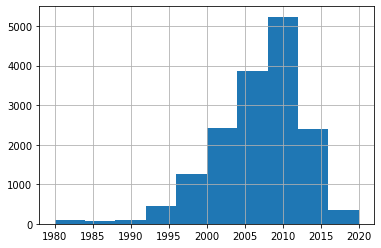

In [34]:
# 히스토그램을 그려 Year 분포를 확인해보자

df['Year'].hist()
plt.show() 

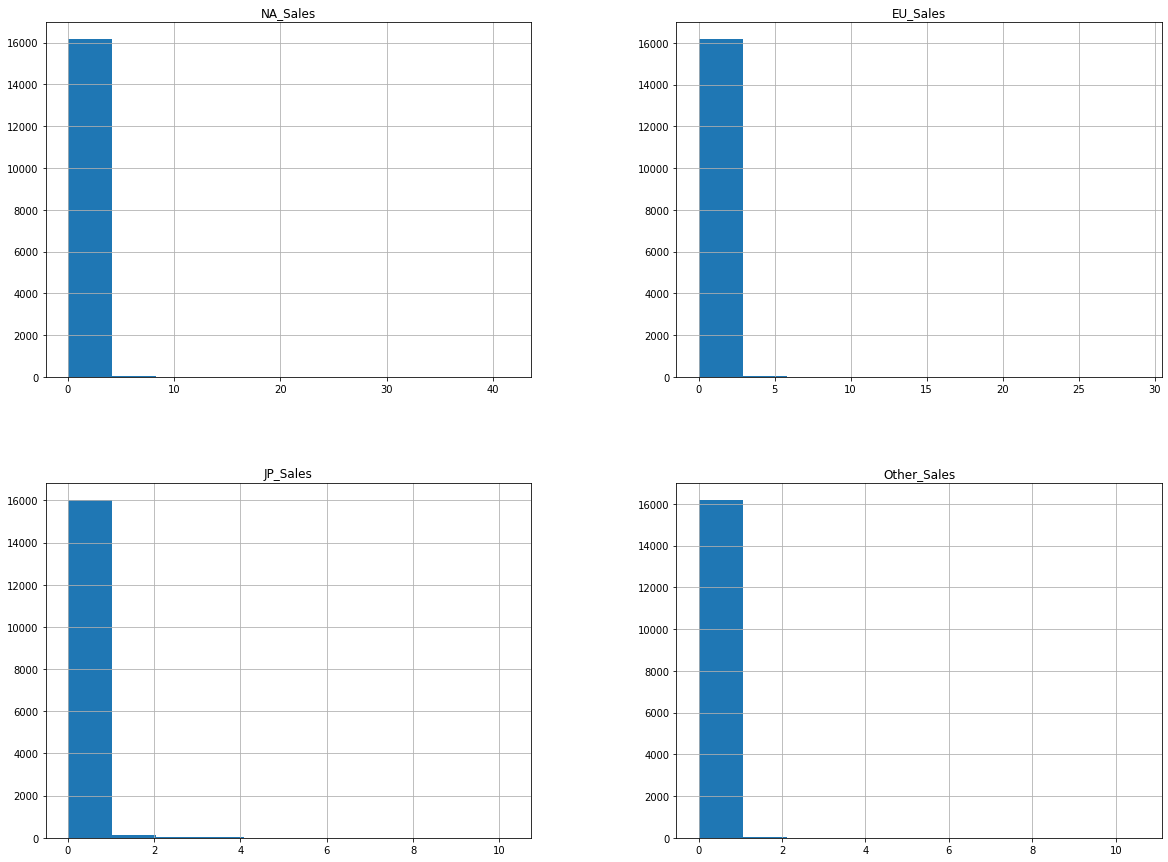

In [35]:
# 다음은 출고량을 위해 추출한 변수 col을 이용해 분포를 알아보자
df[col].hist(figsize=(20,15))
plt.show()

In [36]:
# 최대값이 아예 보이지도 않게 매우 적었던 경우, 즉 매가히트를 친 경우이다.
# 분포가 정상적으로 보이지 않기에 범위를 설정해(bins 파라미터 사용) 다시 봐보자

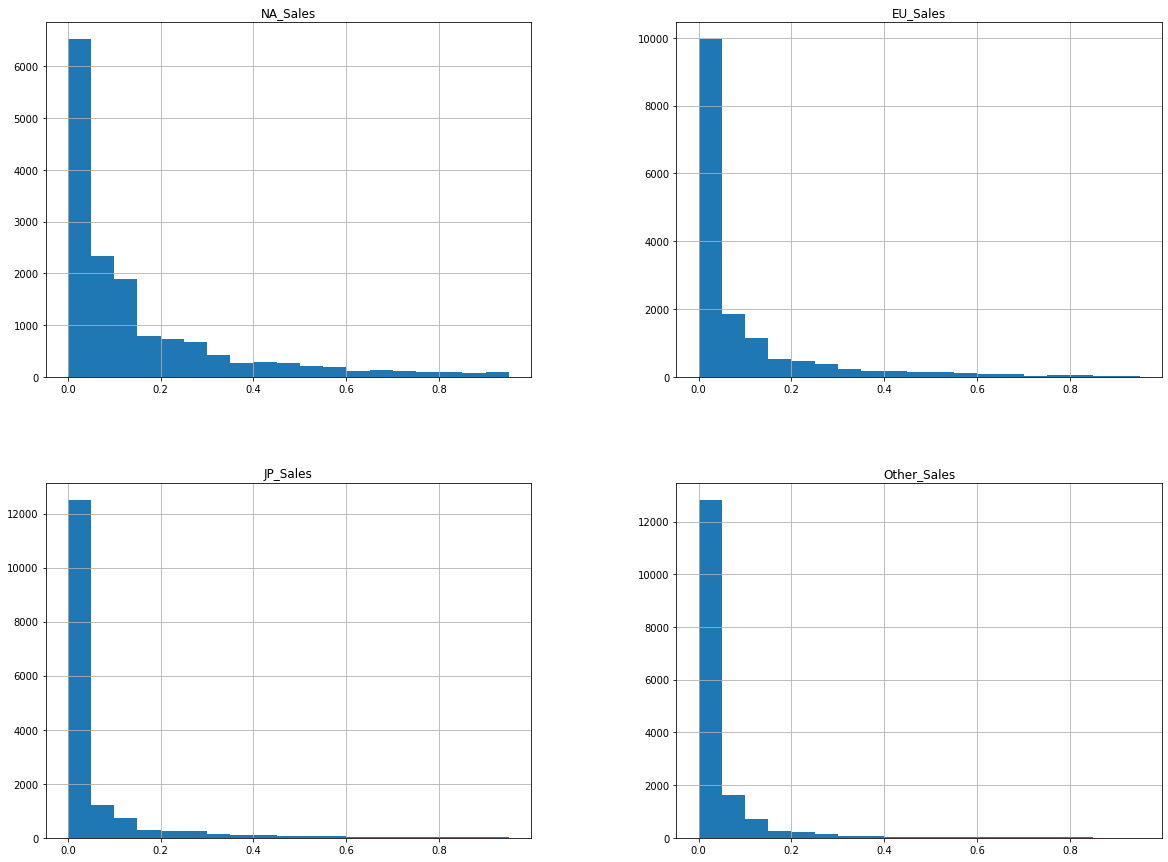

In [37]:
df[col].hist(bins=np.arange(0,1,0.05),figsize=(20,15))
plt.show()

In [38]:
# 분포를 확인해본 결과 대부분의 데이터가 0에 몰려있는 것을 확인할 수 있다.
# 머신러닝 알고리즘에서 패턴을 찾기 쉽게 종모양 분포가 되도록 변형해야 한다.
# 종모양 분포가 되기 위해 로그변환을 수행한다.

In [39]:
data = df.copy()

In [40]:
# 기존 치우침 정도
for i in col:
  print(i, ":", round(data[i].skew(),2),"\n")

NA_Sales : 18.79 

EU_Sales : 18.9 

JP_Sales : 11.23 

Other_Sales : 24.28 



In [41]:
# 로그변환 (Log Transform) 함수 구현
for i in col:
  data[i] = np.log1p(data[i])
  print(i, ":", round(data[i].skew(),2),"\n")
# 기존보다는 치우침 정도가 나아졌다.

NA_Sales : 3.42 

EU_Sales : 4.29 

JP_Sales : 5.42 

Other_Sales : 7.29 



In [42]:
# 변수 사이 관계를 파악하기 위해 상관관계도 살펴보자
df.corr()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,1.000000,-0.091817,0.005330,-0.172307,0.040758
NA_Sales,-0.091817,1.000000,0.768906,0.449358,0.634707
EU_Sales,0.005330,0.768906,1.000000,0.432350,0.728084
JP_Sales,-0.172307,0.449358,0.432350,1.000000,0.285395
Other_Sales,0.040758,0.634707,0.728084,0.285395,1.000000


In [43]:
# 일반적으로 -0.5~-1 이 음의 상관관계, +0.5~+1이 양의 상관관계를 나타내므로 여기서 눈여겨 볼 관계는 
# EU_Sales NA_Sales
# NA_Sales Other_Sales
# EU_Sales Other_Sales
# 출고량 측면에서 일본을 제외한 나머지 변수들은 꽤 강한 상관관계를 가지고 있다.

In [44]:
# 중복값 확인
df.duplicated().sum()

0

In [45]:
'''
전처리는 완료되었다.
좀 더 나은 전처리를 위해 달성하지 못한 것
1. na값 대체하기 
-> na값을 중간값으로 대체한다던가 특정 장르에는 특정 기업이 출현 빈도가 높아 그 기업으로 대체한다 등 대체할 수 있는 방법을 찾아봐야겠다.
2. 왜도 낮추기
-> 배운 변환이 log변환밖에 없어 log변환으로 만족해야 했지만 다른 변환들도 알아봐야겠다.
'''

'\n전처리는 완료되었다.\n좀 더 나은 전처리를 위해 달성하지 못한 것\n1. na값 대체하기 \n-> na값을 중간값으로 대체한다던가 특정 장르에는 특정 기업이 출현 빈도가 높아 그 기업으로 대체한다 등 대체할 수 있는 방법을 찾아봐야겠다.\n2. 왜도 낮추기\n-> 배운 변환이 log변환밖에 없어 log변환으로 만족해야 했지만 다른 변환들도 알아봐야겠다.\n'

# 1. 지역에따라서 선호하는 게임장르가 다를까

## 시각화

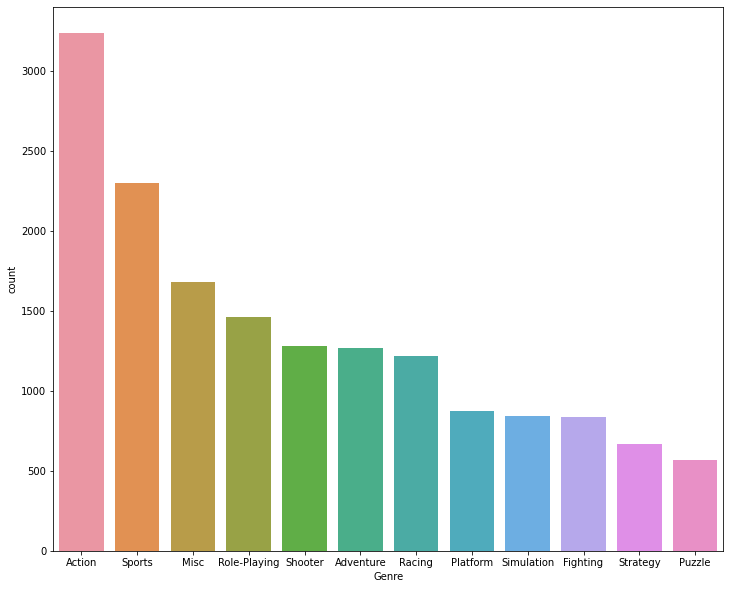

In [46]:
# 우선 장르별 선호도를 보자
plt.figure(figsize=(12,10))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index);

In [47]:
# 지역에 따라 선호하는 장르가 다른지 확인해보자
# 장르에 맞춰 그룹을 생성한 뒤 판매량 국가들을 담은 열들만 뽑고 그들의 합을 구한다
group = df.groupby(['Genre'])[col].sum()
group = pd.DataFrame(group)

In [48]:
# 국가별로 구성된 그래프를 보고싶기에 전치시켜준다.
group=group.T

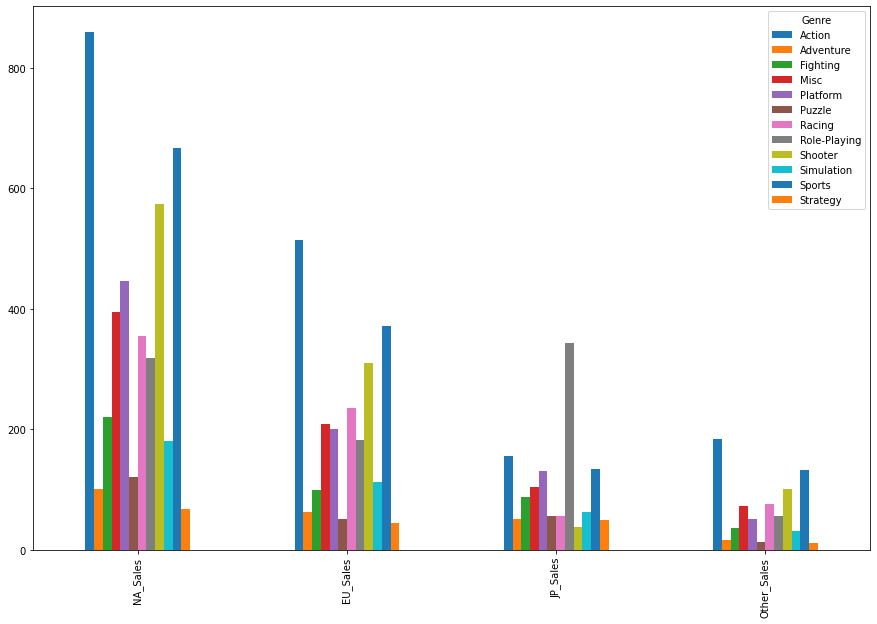

In [49]:
group.plot(kind='bar',figsize=[15,10])
plt.show();

In [50]:
# 숫자로 정확히 봐보자
group.T.sort_values(by=['NA_Sales'], ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Sports,667.26,370.97,134.76,132.35
Shooter,574.48,310.23,38.18,101.86
Platform,445.38,200.63,130.53,51.45
Misc,394.73,208.15,104.18,72.64
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Fighting,220.35,99.90,87.14,36.15
Simulation,181.43,112.99,63.54,31.32


In [51]:
'''
지역에 따라서 선호하는 장르는 일본지역을 제외하고
1위 Action 2위 Sports 3위 Shooter로 동일하다.
하지만 이것은 시각화와 수치들만 보고 평가한 것일 뿐이지 실제로 지역별로 다른지는 가설검정을 통해 확인해보자.
그렇다면 다음과 같은 가설을 세워볼 수 있다.
 
귀무가설 : 지역에 따라 선호하는 게임 장르에 차이가 없다
대립가설 : 지역에 따라 선호하는 게임 장르에 차이가 있다
의 가설을 가지는 이원 카이제곱 검정(동질성 검정)을 이용한다.
이 검정을 통해 나온 p-value가 0.05보다 작으면 대립가설을 채택한다.
'''

'\n지역에 따라서 선호하는 장르는 일본지역을 제외하고\n1위 Action 2위 Sports 3위 Shooter로 동일하다.\n하지만 이것은 시각화와 수치들만 보고 평가한 것일 뿐이지 실제로 지역별로 다른지는 가설검정을 통해 확인해보자.\n그렇다면 다음과 같은 가설을 세워볼 수 있다.\n \n귀무가설 : 지역에 따라 선호하는 게임 장르에 차이가 없다\n대립가설 : 지역에 따라 선호하는 게임 장르에 차이가 있다\n의 가설을 가지는 이원 카이제곱 검정(동질성 검정)을 이용한다.\n이 검정을 통해 나온 p-value가 0.05보다 작으면 대립가설을 채택한다.\n'

## 가설검정

In [52]:
# 동질성 검정
# 연구가설의 종속변인은 범주형 자료
# 기대 빈도가 5이하인 셀이 전체의 20%가 넘지 않도록 해야한다.
# 빈도표에 있는 각칸의 빈도는 다른칸의 빈도와 독립적이어야 한다.

In [53]:
from scipy.stats import chi2_contingency

In [54]:
chi = df.groupby('Genre')[col].sum()
chi.T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,858.75,101.79,220.35,394.73,445.38,121.58,354.70,318.76,574.48,181.43,667.26,67.83
EU_Sales,513.64,63.66,99.90,208.15,200.63,50.47,235.02,183.09,310.23,112.99,370.97,44.82
JP_Sales,156.60,51.87,87.14,104.18,130.53,56.24,56.32,342.93,38.18,63.54,134.76,49.10
Other_Sales,183.99,16.70,36.15,72.64,51.45,12.44,76.51,56.73,101.86,31.32,132.35,11.23


In [55]:
chi2, p, dof, ex = chi2_contingency(chi.T)

In [56]:
p # 0.05보다 작으므로 대립가설 채택

9.635373883688875e-123

# 2. 연도별 게임의 트렌드가 있을까

## 시각화

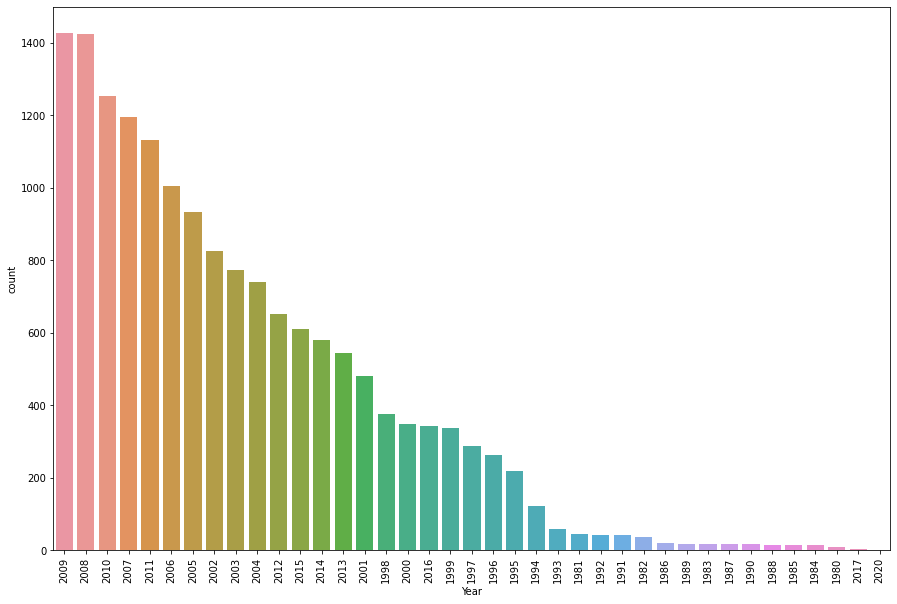

In [57]:
# 게임의 종류가 다양했던 순서대로 연도를 확인해보자
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=df, order = df.groupby('Year')['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90);

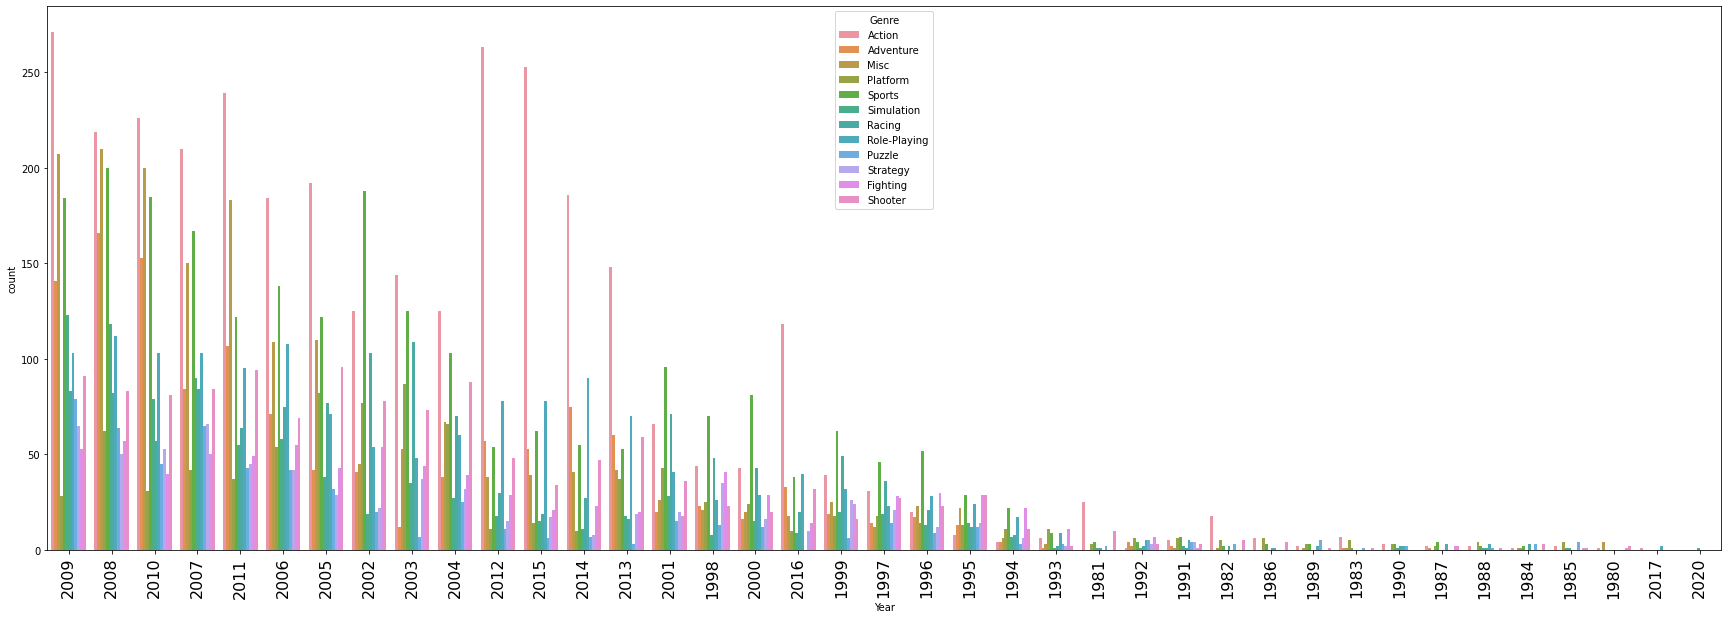

In [58]:
# 연도별로 게임의 장르를 확인해보자
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().index)
plt.xticks(size=16, rotation=90);

In [59]:
'''
일반적으로 Action 장르가 인기가 많은 것을 알 수 있다. 
Misc는 기타장르이기에 제외하고 그 다음은 Sports 장르가 인기가 많다.
시각적으로 보기 좋게 연도별 트렌드를 확인하기 위해 
게임의 갯수별로 (회사가 만든 게임) top 5제품을 연도별로 파악해보자.
'''

'\n일반적으로 Action 장르가 인기가 많은 것을 알 수 있다. \nMisc는 기타장르이기에 제외하고 그 다음은 Sports 장르가 인기가 많다.\n시각적으로 보기 좋게 연도별 트렌드를 확인하기 위해 \n게임의 갯수별로 (회사가 만든 게임) top 5제품을 연도별로 파악해보자.\n'

In [60]:
import plotly.express as px

In [61]:
tdf = df.copy()
tdf = tdf.sort_values('Year', ascending=True)
# 게임의 갯수별로 확인
fig = px.histogram(tdf,x='Genre',animation_frame='Year',range_x=[0,4],range_y=[0, 300]) # x범위를 0,2를 주어 5개만 볼 수 있게
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='max descending') #큰 순서대로 확인
fig.show();

In [62]:
'''
위의 그래프를 이용해 어떤 장르의 게임이 그해의 트렌드였는지 확인할 수 있다.
하지만 이것은 최대값을 이용한 그래프이기에 과연 이 그래프가 정말 트렌드를 나타내는 것인지는 알 수 없다.
그래서 트렌드의 정의를 찾아보니 '사상이나 행동 또는 어떤 현상에서 나타나는 일정한 방향' 이라고 한다.
그렇기에 방향을 보여주는 선형그래프로 트렌드를 확인해보자.
'''

"\n위의 그래프를 이용해 어떤 장르의 게임이 그해의 트렌드였는지 확인할 수 있다.\n하지만 이것은 최대값을 이용한 그래프이기에 과연 이 그래프가 정말 트렌드를 나타내는 것인지는 알 수 없다.\n그래서 트렌드의 정의를 찾아보니 '사상이나 행동 또는 어떤 현상에서 나타나는 일정한 방향' 이라고 한다.\n그렇기에 방향을 보여주는 선형그래프로 트렌드를 확인해보자.\n"

In [63]:
# 그전에 아래의 데이터프레임처럼 2017이후의 데이터가 적기 때문에 이 데이터들을 제외해준 데이터프레임을 사용해 시각화해보자
que="Year >= 2017"
df.query(que)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5196,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.0,0.01,0.00
6765,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.00,0.02
9911,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.0,0.03,0.00
14903,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.0,0.01,0.00


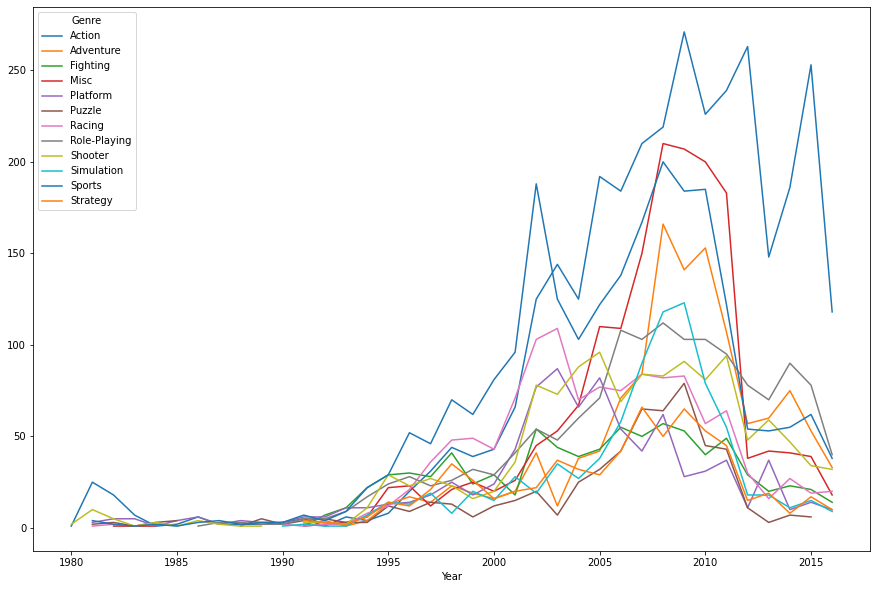

In [64]:
que="Year < 2017"
temp=df.query(que)
temp.groupby(['Year','Genre'])['Name'].count().unstack().plot(figsize=[15,10]);

In [65]:
# 판매량을 다 더한 열을 새로 만들어 그 열에 대한 시각화도 봐보자
temp['Sum'] = temp['NA_Sales'] + temp['EU_Sales'] + temp['JP_Sales'] + temp['Other_Sales'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



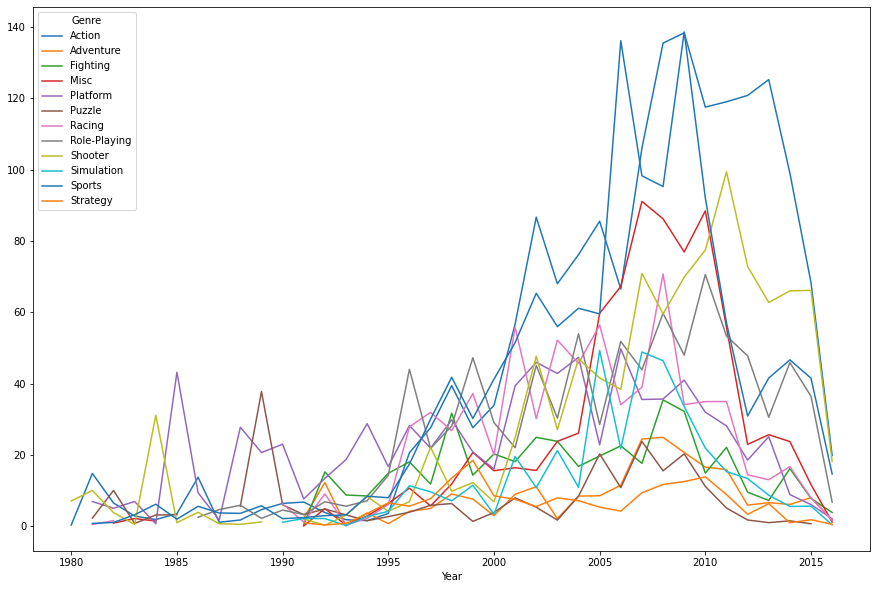

In [66]:
temp.groupby(['Year','Genre'])['Sum'].sum().unstack().plot(figsize=[15,10]);

In [67]:
'''
시각화 그래프를 코드로 구현한 결과
해당년도의 높은 점유율을 가진 장르를 보고 싶다면 막대그래프를 봐서 확인할 수 있고
전체년도의 게임장르의 추세를 확인하고 싶다면 선형그래프를 봐서 확인할 수 있다.


선형그래프를 참고했을 때 2007-2010년 이후로 급격하게 그래프가 꺾이는 모습을 볼 수 있다.
이것이 게임산업의 쇠퇴로 인한 것인지 데이터의 부족으로 인한 현상인지 알 수 없다.

더불어 게임장르별 갯수의 그래프와 게임장르별 판매량의 그래프가 약간 상이한 형태를 보인다.

'''

'\n시각화 그래프를 코드로 구현한 결과\n해당년도의 높은 점유율을 가진 장르를 보고 싶다면 막대그래프를 봐서 확인할 수 있고\n전체년도의 게임장르의 추세를 확인하고 싶다면 선형그래프를 봐서 확인할 수 있다.\n\n\n선형그래프를 참고했을 때 2007-2010년 이후로 급격하게 그래프가 꺾이는 모습을 볼 수 있다.\n이것이 게임산업의 쇠퇴로 인한 것인지 데이터의 부족으로 인한 현상인지 알 수 없다.\n\n더불어 게임장르별 갯수의 그래프와 게임장르별 판매량의 그래프가 약간 상이한 형태를 보인다.\n\n'

## 가설검정

In [68]:
# 트렌드를 나타내기 위해 클러스터로 집단생성하기

In [69]:
# 데이터 표준화하기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Z = scaler.fit_transform(df[col])

# 범주형을 수치형 변수로 변환
from sklearn.preprocessing import LabelEncoder
data = df.copy()
le = LabelEncoder()
data['Platform'] = le.fit_transform(df['Platform'])
data['Genre'] = le.fit_transform(df['Genre'])

# 표준화된 데이터와 수치형으로 변환한 데이터를 합친 데이터프레임 생성
new = pd.DataFrame(Z, columns = col)
new = new.assign(Platform = data['Platform'])
new = new.assign(Genre = data['Genre'])

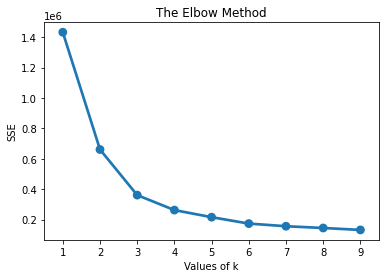

In [70]:
# 클러스터를 몇개로 할 지에 대한 elbow method 시각화
from sklearn.cluster import KMeans
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(new)
  sse[k] = kmeans.inertia_

# 결과 시각화
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show() # 최적의 K는 3으로 두고 K-Means Clustering 진행

In [71]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(new)

# 클러스터 라벨 변수
cluster_labels = kmeans.labels_
# 표준화된 데이터에 추가
new_c3 = new.assign(Cluster = cluster_labels)

In [72]:
# 슬라이싱할 새로운 열 생성
# 기대 빈도가 5이하인 셀이 전체의 20%가 넘지 않도록 해야하기 때문에 5년을 주기로 함
data['S_Year'] = 0
def find_group(value):
    groups = list(range(1980,2025,5))
    for i in range(len(groups)):
        if value < groups[i]:
            if i == 0:
                return 0
            
            return groups[i-1]
          
data['S_Year'] = [find_group(e) for e in data.Year]

In [73]:
# 귀무가설 : 연도별로 게임의 트렌드는 차이가 없다
# 대립가설 : 연도별로 게임의 트렌드는 차이가 있다
cro = pd.crosstab(new_c3['Cluster'], data['S_Year'])
chi = chi2_contingency(cro, correction=False)
print('Chi2 Statistic: {}, p-value: {}'.format(chi[0], chi[1]))

Chi2 Statistic: 1309.4614666636437, p-value: 4.978417691116615e-271


In [74]:
cro

S_Year,1980.0,1985.0,1990.0,1995.0,2000.0,2005.0,2010.0,2015.0
Cluster,,,,,,,,
0,0,0,154,95,558,1630,1263,222
1,102,25,51,304,1158,1908,888,121
2,19,58,76,1084,1452,2447,2012,613


In [75]:
'''
p-value가 0.05보다 작으니 대립가설을 채택한다.
즉 연도별로 게임의 트렌드가 있다는 의미이다.
예를 들어 1980-1985년도에는 집단1에 속한 게임이 트렌드였음을 알 수 있다.
'''

'\np-value가 0.05보다 작으니 대립가설을 채택한다.\n즉 연도별로 게임의 트렌드가 있다는 의미이다.\n예를 들어 1980-1985년도에는 집단1에 속한 게임이 트렌드였음을 알 수 있다.\n'

# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [76]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [77]:
# 출고량이 높은 게임을 알기 위해 출고량을 다 더한 새로운 열 생성
df['Sum'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] 

In [78]:
# 출고량이 높은순서대로 100개를 뽑아서 분석 및 시각화하기 위해 샘플 데이터 추출
sam_100=df.sort_values('Sum',ascending=False)
sam_100.reset_index(drop=True,inplace=True)
sam_100=sam_100.loc[:100]

In [79]:
# 시각화 구현 함수 생성
def visual(x):
  fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

  # 전체 데이터에 대한 파이차트
  fig.add_trace(go.Pie(labels=df[x],values=df['Sum'], name="Full data"),
              1, 1)
  # 샘플 데이터에 대한 파이차트
  fig.add_trace(go.Pie(labels=sam_100[x], values=sam_100['Sum'], name="Sample data"),
              1, 2)

  #글자는 안에넣고 퍼센트와 라벨이 함께 나오게 설정하고 hole을 넣어 도넛파이차트로 만듦
  fig.update_traces(hole=.4, textposition='inside', textinfo='percent+label')


  fig.update_layout(
    title_text="Video Games "+x,
    # 도넛 파이에 대한 내용
    annotations=[dict(text='Full', x=0.21, y=0.5, font_size=20, showarrow=False),
                 dict(text='Sample', x=0.81, y=0.5, font_size=20, showarrow=False)])

  fig.show()


In [80]:
# 출고량이 높은 게임들의 장르
visual('Genre')

In [81]:
# 출고량이 높은 게임들의 플랫폼
visual('Platform')

In [82]:
# 출고량이 높은 게임들의 제작사
visual('Publisher')

In [83]:
# 출고량이 높은 게임들의 연도
visual('Year')

In [84]:
# 출고량이 높은 게임들의 국가
# 이를 알기 위해서는 visual함수와 다르게 작성해주어야 한다.
# 각 국가별 출고량 합계의 값들을 리스트에 담아준다.

fval = [] # 전체데이터 나라별 출고합계
sval = []  # 샘플데이터 나라별 출고합계
for i in col:
  fval.append(df[i].sum())
  sval.append(sam_100[i].sum()) 

In [85]:
# 시각화 구현
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# 전체 데이터에 대한 파이차트
fig.add_trace(go.Pie(labels=col,values=fval, name="Full data"),
            1, 1)
# 샘플 데이터에 대한 파이차트
fig.add_trace(go.Pie(labels=col, values=sval, name="Sample data"),
            1, 2)

#글자는 안에넣고 퍼센트와 라벨이 함께 나오게 설정하고 hole을 넣어 도넛파이차트로 만듦
fig.update_traces(hole=.4, textposition='inside', textinfo='percent+label')


fig.update_layout(
  title_text="Video Games Nation",
  # 도넛 파이에 대한 내용
  annotations=[dict(text='Full', x=0.21, y=0.5, font_size=20, showarrow=False),
                dict(text='Sample', x=0.81, y=0.5, font_size=20, showarrow=False)])

fig.show()



# 4. 개인적인 분석

## 국가별로 Top10 출고량 게임 (장르, 제조사, 플랫폼)

In [86]:
# 국가별로 Top10 비디오 게임 출고량 (장르, 제조사, 플랫폼)
top_sales = df.sort_values(by=col, ascending=False).head(10)


dicts_name = {
    'NA_Sales' : "North America Sales ( In Millions)",
    'EU_Sales' : "Europe Sales ( In Millions)",
    'JP_Sales' : "Japan Sales ( In Millions)",
    'Other_Sales' : "Other Sales ( In Millions)",
}

for (key, title) in dicts_name.items():
    
    fig = px.sunburst(top_sales, path=['Genre', 'Publisher', 'Platform'], values=key, title= 'Top Selling by '+ title)
    
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=40, l=2, r=2, b=5)
    )

    fig.show()


## 머신러닝 알고리즘을 위한 데이터 정제

In [87]:
'''
머신러닝 알고리즘을 수행하기 위해서는 
1. na값이 있어서는 안된다.
2. 수치형 데이터로 구성한다.
3. 특성 스케일링을 한다. (정규화 및 표준화)
4. 데이터를 train과 test로 분할한다.

다시 데이터를 정제해보자
'''

'\n머신러닝 알고리즘을 수행하기 위해서는 \n1. na값이 있어서는 안된다.\n2. 수치형 데이터로 구성한다.\n3. 특성 스케일링을 한다. (정규화 및 표준화)\n4. 데이터를 train과 test로 분할한다.\n\n다시 데이터를 정제해보자\n'

In [88]:
# 데이터 세팅
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2.csv', index_col=0)
df.reset_index(drop=True,inplace=True)
def nan(col):
  ind = df[col][df[col].isnull()].index
  sam = df.iloc[ind]
  return sam.head()
nan('Year')
nan('Genre')
nan('Publisher')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) 
df['Year'] = df['Year'].astype(int)
def kmremove(x):
  # K제거
  ind1 = df[df[x].str.contains('K')].index
  df.loc[ind1,x] = df.loc[ind1,x].str.replace('K','')
  # M제거
  ind2 = df[df[x].str.contains('M')].index
  df.loc[ind2,x] = df.loc[ind2,x].str.replace('M','')
  # int로 형변환
  df[x] = df[x].astype(float)
  # K를 M단위로 바꿔주기
  df.loc[ind1,x] = df.loc[ind1,x] / 1000

col = ['NA_Sales',  'EU_Sales', 'JP_Sales', 'Other_Sales']
for i in col:
  kmremove(i)
que1 = "Year >= 50 and Year <=200"
ind1 = df.query(que1).index
df.loc[ind1,'Year'] = df.loc[ind1,'Year'] + 1900

que2 = "Year >= 0 and Year <=20"
ind2 = df.query(que2).index
df.loc[ind2,'Year'] = df.loc[ind2,'Year'] + 2000
for i in col:
  df[i] = np.log1p(df[i])



In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [90]:
'''
na값은 없으며
여기서 수치형 데이터가 아닌 것은 Name, Platform, Genre, Publisher 이다.
이중 Name은 종류가 매우 다양하기에 제외한다.
따라서 Platform, Genre, Publisher 를 수치형 데이터 만들기 위해 LableEncoder를 사용한다.


더불어 타겟변수는 NA_Sales로 선정한다.
3번 주제인 출고량이 높은 게임에 대한 분석 및 시각화 프로세스에서 보았듯이 NA_Sales가 많은 출고량을 가지고 있기 때문에
북미지역에서 히트를 치는 것이 중요한 이슈이기 때문이다.

'''

'\nna값은 없으며\n여기서 수치형 데이터가 아닌 것은 Name, Platform, Genre, Publisher 이다.\n이중 Name은 종류가 매우 다양하기에 제외한다.\n따라서 Platform, Genre, Publisher 를 수치형 데이터 만들기 위해 LableEncoder를 사용한다.\n\n\n더불어 타겟변수는 NA_Sales로 선정한다.\n3번 주제인 출고량이 높은 게임에 대한 분석 및 시각화 프로세스에서 보았듯이 NA_Sales가 많은 출고량을 가지고 있기 때문에\n북미지역에서 히트를 치는 것이 중요한 이슈이기 때문이다.\n\n'

In [91]:
# 범주형을 수치형 변수로 변환
from sklearn.preprocessing import LabelEncoder

In [92]:
data = df.copy()
le = LabelEncoder()
data['Platform'] = le.fit_transform(df['Platform'])
# 변환된 인덱스에 해당되는 클래스들
le.classes_

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [93]:
data['Genre'] = le.fit_transform(df['Genre'])
le.classes_

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [94]:
data['Publisher'] = le.fit_transform(df['Publisher'])
le.classes_

array(['10TACLE Studios', '1C Company', '20th Century Fox Video Games',
       '2D Boy', '3DO', '49Games', '505 Games', '5pb', '7G//AMES',
       '989 Sports', '989 Studios', 'AQ Interactive', 'ASC Games',
       'ASCII Entertainment', 'ASCII Media Works', 'ASK', 'Abylight',
       'Acclaim Entertainment', 'Accolade', 'Ackkstudios', 'Acquire',
       'Activision', 'Activision Blizzard', 'Activision Value',
       'Adeline Software', 'Aerosoft', 'Agatsuma Entertainment', 'Agetec',
       'Aksys Games', 'Alawar Entertainment', 'Alchemist',
       'Alternative Software', 'Altron', 'Alvion', 'American Softworks',
       'Angel Studios', 'Answer Software', 'Aqua Plus', 'Aques',
       'Arc System Works', 'Arena Entertainment', 'Aria', 'Arika',
       'ArtDink', 'Aruze Corp', 'Ascaron Entertainment',
       'Ascaron Entertainment GmbH', 'Asgard', 'Asmik Ace Entertainment',
       'Asmik Corp', 'Aspyr', 'Astragon', 'Asylum Entertainment', 'Atari',
       'Athena', 'Atlus', 'Avalon Interactive

In [95]:
# 훈련, 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X = data[['Platform',	'Genre',	'Publisher',	'EU_Sales',	'JP_Sales',	'Other_Sales']]
y = data['NA_Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

In [96]:
'''
정제가 끝났다. 이제 회귀 분석을 통해 NA_Sales 출고량을 예측할 모델을 만들어 보자
'''

'\n정제가 끝났다. 이제 회귀 분석을 통해 NA_Sales 출고량을 예측할 모델을 만들어 보자\n'

## 회귀모델

In [97]:
'''
어떤 모델을 선택할 것인지 결정하기 위해 여러가지 모델을 훈련시켜보자
Regression 점수 : MAE, MSE, RMSE, R2, RMSLE, MAPE
다중 회귀 분석의 결과 지표 중 하나는 "결정계수"이다. 1에 가까울 수록 좋은 결과라고 말한다.
결정계수는 회귀 분석에 의해 도출된 목적 변수의 예측 값이, 실제 목적 변수의 값과 어느정도 일지하는가를 표시하는 지표이다.
이중 필자는 보통 R2의 성능평가를 신빙성 있게 사용한다고 하여 R2를 분석결과의 지표로 선택하였다. 
'''

'\n어떤 모델을 선택할 것인지 결정하기 위해 여러가지 모델을 훈련시켜보자\nRegression 점수 : MAE, MSE, RMSE, R2, RMSLE, MAPE\n다중 회귀 분석의 결과 지표 중 하나는 "결정계수"이다. 1에 가까울 수록 좋은 결과라고 말한다.\n결정계수는 회귀 분석에 의해 도출된 목적 변수의 예측 값이, 실제 목적 변수의 값과 어느정도 일지하는가를 표시하는 지표이다.\n이중 필자는 보통 R2의 성능평가를 신빙성 있게 사용한다고 하여 R2를 분석결과의 지표로 선택하였다. \n'

In [98]:
# 랜덤포레스트 모델
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score # R2 지표
#학습 진행
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

#예측
pred = rfr.predict(X_test)

#정확도 확인
r2 = r2_score(y_test,pred)

In [99]:
print(r2)

print(rfr.score(X_test, y_test))

0.8510727406194943
0.8510727406194943


In [100]:
rfr.feature_importances_ #인덱스 위치를 생각해보았을 때 EU_Sales가 가장 영향력

array([0.11711517, 0.02960928, 0.02795841, 0.48864151, 0.05368594,
       0.28298968])

In [101]:
# 선형회귀 모델
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
r2 = r2_score(y_test,pred)

In [102]:
print(r2)

print(rfr.score(X_test, y_test))

0.6086687260689712
0.8510727406194943


In [103]:
# KNN 모델
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
kRange = range(1,15,1)

scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    
    regressor_knn.fit(X_train,y_train)
    pred = regressor_knn.predict(X_test)
    
    scores_list.append(r2_score(y_test,pred))


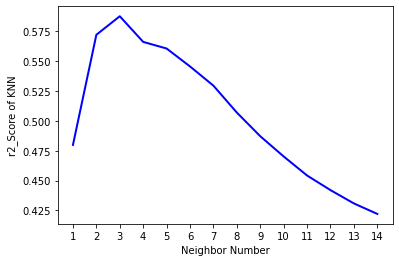

In [104]:
plt.plot(kRange, scores_list, linewidth=2, color='blue')
plt.xticks(kRange)

plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show()   

In [105]:
# 위의 그래프에서 N이 3일때 가장 높은 점수를 가졌기에 3으로 파라미터를 설정한다
regressor_knn = KNeighborsRegressor(n_neighbors = 3)

regressor_knn.fit(X_train,y_train)
pred = regressor_knn.predict(X_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.5876675076892095


In [106]:
# 결정나무 모델
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=32)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print(r2_score(y_test, pred))

0.768045926621384


In [107]:
'''
이중에서 제일 점수가 높은 모델은 랜덤포레스트 이다.
생성된 회귀모델은 다른 독립변수들이 주어졌을 때 NA_Sales를 대략 85% 정도 잘 설명할 수 있다는 것을 알게되었다. 
이 회귀모델에 'Platform',	'Genre',	'Publisher',	'EU_Sales',	'JP_Sales',	'Other_Sales'의 새로운 값의 데이터를 주면 NA_Sales를 85%의 정확성으로 예측한다.
'''

"\n이중에서 제일 점수가 높은 모델은 랜덤포레스트 이다.\n생성된 회귀모델은 다른 독립변수들이 주어졌을 때 NA_Sales를 대략 85% 정도 잘 설명할 수 있다는 것을 알게되었다. \n이 회귀모델에 'Platform',\t'Genre',\t'Publisher',\t'EU_Sales',\t'JP_Sales',\t'Other_Sales'의 새로운 값의 데이터를 주면 NA_Sales를 85%의 정확성으로 예측한다.\n"

## 분류 모델

In [108]:
'''
EDA 과정에서 NA값을 drop했는데 분류모델을 사용해 NA값을 대체할 수 있지 않을까하는 의문으로 시작한 분석이다.
'Year', 'Genre', 'Publisher' 결측치를 랜덤포레스트 모델을 사용해 대체할 수 있을지 조사했다.
'''

"\nEDA 과정에서 NA값을 drop했는데 분류모델을 사용해 NA값을 대체할 수 있지 않을까하는 의문으로 시작한 분석이다.\n'Year', 'Genre', 'Publisher' 결측치를 랜덤포레스트 모델을 사용해 대체할 수 있을지 조사했다.\n"

### Year 결측치

In [109]:
X = data[['Platform',	'Genre',	'Publisher','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]
y = data['Year'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

In [110]:
from sklearn.ensemble import RandomForestClassifier
#학습 진행
clf = RandomForestClassifier(random_state=42)
clf.fit( X_train, y_train)

#예측
pred = clf.predict(X_test)

#정확도 확인
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.21729763004001232


In [111]:
'''
정확도가 0.22 정도로 낮은 것을 볼 수 있다.
'''

'\n정확도가 0.22 정도로 낮은 것을 볼 수 있다.\n'

### Genre 결측치

In [112]:
# 훈련, 테스트 데이터 분할
X = data[['Platform',	'Year',	'Publisher','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]
y = data['Genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

#학습 진행
clf = RandomForestClassifier(random_state=42)
clf.fit( X_train, y_train)

#예측
pred = clf.predict(X_test)

#정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.3197907048322561


### Publisher 결측치

In [113]:
# 훈련, 테스트 데이터 분할
X = data[['Platform',	'Year',	'Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]
y = data['Publisher'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

#학습 진행
clf = RandomForestClassifier(random_state=42)
clf.fit( X_train, y_train)

#예측
pred = clf.predict(X_test)

#정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.21268082486919052


In [114]:
'''
3개의 결측치가 있는 컬럼을 분류모델을 사용해 예측해보려고 하였으나 정확도가 0.2~0.3 정도로 0.5도 넘지 못하기에 모델로 채택하기에는 무리가 있다고 판단된다.
따라서 추후에 학습할 웹크롤링을 이용해 결측치를 대체하는 것이 더 안전하게 결측치를 대체하는 방법이다.
'''

'\n3개의 결측치가 있는 컬럼을 분류모델을 사용해 예측해보려고 하였으나 정확도가 0.2~0.3 정도로 0.5도 넘지 못하기에 모델로 채택하기에는 무리가 있다고 판단된다.\n따라서 추후에 학습할 웹크롤링을 이용해 결측치를 대체하는 것이 더 안전하게 결측치를 대체하는 방법이다.\n'

# 5. 결론

In [115]:
'''
단순 출고량으로 출시할 게임의 방향성을 판단하자면
장르 Action 이며
구동기기 PS2 를 갖추고 있고
제작사 Nintendo 에게 맡기며
국가 NA_Sales (북미)을 겨냥한
게임을 설계하는 것이 타당하다고 본다.

북미를 겨냥한 게임을 출시할 때 유럽, 일본, 다른 국가에 선발매를 한 후 출고량을 조사한 뒤
위에서 생성한 회귀모델(랜덤포레스트)로 예측하여 북미에서 출고량을 85%의 정확도로 판단할 수 있다.
그렇다면 기업입장에서 위험성 부담을 줄일 수 있다.

어떤 나라를 타겟으로 하는 게임을 출시할 때는 개인적인 분석에서 생성한 도넛모양 차트를 참고해 해당 국가 출고량 Top10 비디오 게임에 대한
장르, 제조사, 플랫폼의 종류를 확인해 도움을 받을 수 있다.

그러나 이미 나온 제품이기에 차별화가 되지 않아 좋은 성적이 나오지 않을 수 있다.

따라서 적절한 의사결정이 필요하다.
'''

'\n단순 출고량으로 출시할 게임의 방향성을 판단하자면\n장르 Action 이며\n구동기기 PS2 를 갖추고 있고\n제작사 Nintendo 에게 맡기며\n국가 NA_Sales (북미)을 겨냥한\n게임을 설계하는 것이 타당하다고 본다.\n\n북미를 겨냥한 게임을 출시할 때 유럽, 일본, 다른 국가에 선발매를 한 후 출고량을 조사한 뒤\n위에서 생성한 회귀모델(랜덤포레스트)로 예측하여 북미에서 출고량을 85%의 정확도로 판단할 수 있다.\n그렇다면 기업입장에서 위험성 부담을 줄일 수 있다.\n\n어떤 나라를 타겟으로 하는 게임을 출시할 때는 개인적인 분석에서 생성한 도넛모양 차트를 참고해 해당 국가 출고량 Top10 비디오 게임에 대한\n장르, 제조사, 플랫폼의 종류를 확인해 도움을 받을 수 있다.\n\n그러나 이미 나온 제품이기에 차별화가 되지 않아 좋은 성적이 나오지 않을 수 있다.\n\n따라서 적절한 의사결정이 필요하다.\n'

In [116]:
'''
한계
처음에 AutoML을 이용해 더 좋은 성능의 모델을 찾으려고 하였으나 복잡한 파라미터와 모델을 찾는데 런타임시간이 40분 이상씩 걸려 구현하지 못하였다.
머신러닝 모델의 점수를 평가하는 것들에 대한 지식이 없어서 어떤 기준의 점수로 모델을 평가해야 하는지 확실치 않았다.
3번 주제에서 트렌드를 파악하는 문제가 잘 이해가 가지 않았다.
머신러닝 모델을 앙상블하는 전략도 사용하고 싶었으나 아직 배우지 않은 부분이라 구현하지 않았다.

더 깊은 분석을 위해 더 많은 시간을 들여 추후에 관련된 레퍼런스를 참고하며 한계에 해당하는 부분을 채워나갈 것이다.
'''

'\n한계\n처음에 AutoML을 이용해 더 좋은 성능의 모델을 찾으려고 하였으나 복잡한 파라미터와 모델을 찾는데 런타임시간이 40분 이상씩 걸려 구현하지 못하였다.\n머신러닝 모델의 점수를 평가하는 것들에 대한 지식이 없어서 어떤 기준의 점수로 모델을 평가해야 하는지 확실치 않았다.\n3번 주제에서 트렌드를 파악하는 문제가 잘 이해가 가지 않았다.\n머신러닝 모델을 앙상블하는 전략도 사용하고 싶었으나 아직 배우지 않은 부분이라 구현하지 않았다.\n\n더 깊은 분석을 위해 더 많은 시간을 들여 추후에 관련된 레퍼런스를 참고하며 한계에 해당하는 부분을 채워나갈 것이다.\n'